In [5]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**IMPORT DATA SET**

```
# This is formatted as code
```



In [7]:
# read the dataset using pandas
data = pd.read_csv('student_scores.csv')

In [8]:
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


**Exploratory Data Analysis**

In [9]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.isna().sum() #isna()= ngecek ada missing value ga. kemudian dijumlahkan dengan menggunakan sum(). Kalau 0 aman

Hours     0
Scores    0
dtype: int64

In [11]:
data.value_counts() #sebaran nilai. untuk gabungan data hours sekian dengan data scores sekian berapa banyak data.

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
Name: count, dtype: int64

In [12]:
# this describes the basic stat behind the dataset used
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 900x500 with 0 Axes>

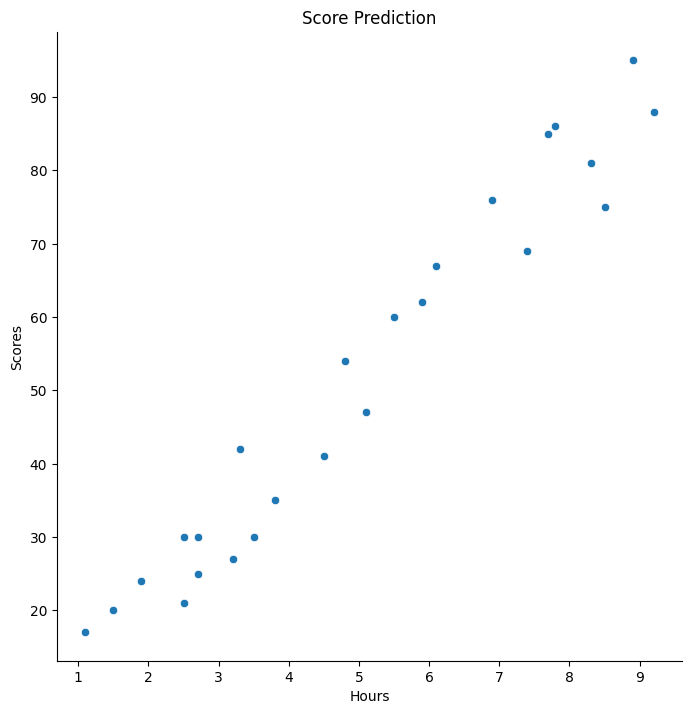

In [13]:
plt.figure(figsize=(9,5))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter') #dilihat hasil datanya secara pairplot dengan pertama di dalam kurung merupakan datanya,...
#dengan nilai x selanjutnya berupa hours belajar , kemudian nilai y berupa scores-nya, ukuran bulet2, bentuk bulet
plt.xlabel('Hours') #label x
plt.ylabel('Scores') #label y
plt.title('Score Prediction') # title visual
plt.show() #nampilin
#hasilnya linear

In [14]:
!pip install --upgrade gspread
!pip install --upgrade oauth2client
!pip install --upgrade gspread gspread-dataframe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
  Attempting uninstall: gspread-dataframe
    Found existing installation: gspread-dataframe 3.3.1
    Uninstalling gspread-dataframe-3.3.1:
      Successfully uninstalled gspread-dataframe-3.3.1


**Investigate of Feature Engineering**

In [15]:
df = data.copy() #data duplikat

In [16]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape) #baris,kolom

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [17]:
#tidak ada data duplikat
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [18]:
#menghapus data duplikat
df = df.drop_duplicates()

In [19]:
#ternyata emang gada duplikat dengan terbukti setelah dihapus duplikat sama sebelum sama
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


In [20]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

There is no missing value

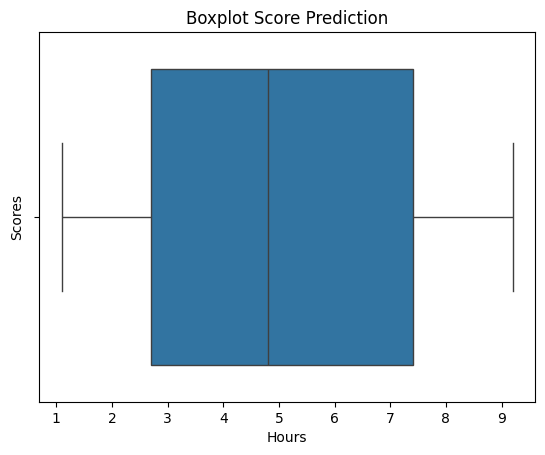

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

**Splitting the data**

In [22]:
# Hours study data
X = data['Hours']
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [23]:
# Scores data
y = data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [24]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [25]:
# Split the data for train and test
#jadi nanti nilai X akan dipecah jadi x_train dan x_test dengan rasio 75% untuk train, sisanya buat test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

**LINEAR REGRESSION**

In [26]:
#library yang dipake
!pip install scikit-learn

In [27]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [28]:
#Karena nilai x nya cuman 1 atau 1 kolom saja (harus ubah ke array). Kalau ada 2, maka langsung pake X_Train saja
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]

In [29]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [30]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [31]:
y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [32]:
#mesin mempelajari data train
# Reshape X_train dari (18, 1, 1) menjadi (18, 1)
X_train_reshaped = X_train.reshape(18, 1)
#harus 2 dimensi
# Memastikan Y_train dalam bentuk yang sesuai
Y_train_reshaped = y_train

# Latih model regresi linear dengan data yang sudah direshape
lr_model = LinearRegression()
lr_model.fit(X_train_reshaped, Y_train_reshaped)

LinearRegression()

In [36]:
#evaluasi model ke x test
y_pred=lr_model.predict(X_test)

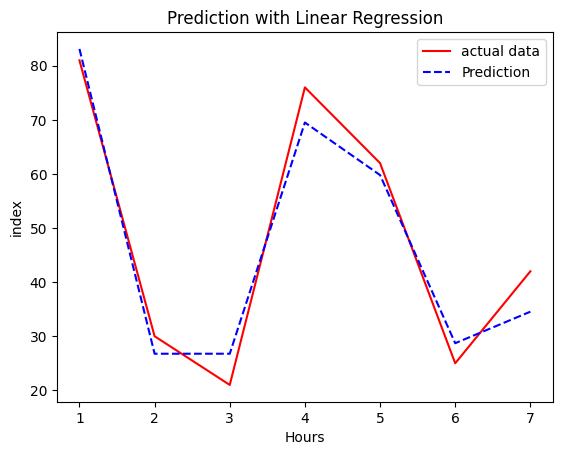

In [37]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [34]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [39]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [40]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


Kesimpulan untuk Linear Regression ini didapat persamaan untuk banyaknya scores(y) dengan input hours(x):

**y = 9.71409219x + 2.4803670915057623**


**Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
# Latih model decision tree dengan data yang sudah direshape
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_reshaped, y_train)

DecisionTreeRegressor()

In [45]:
#Predicting the Student Scores for the Test values
y_pred_dt=dt_model.predict(X_test)

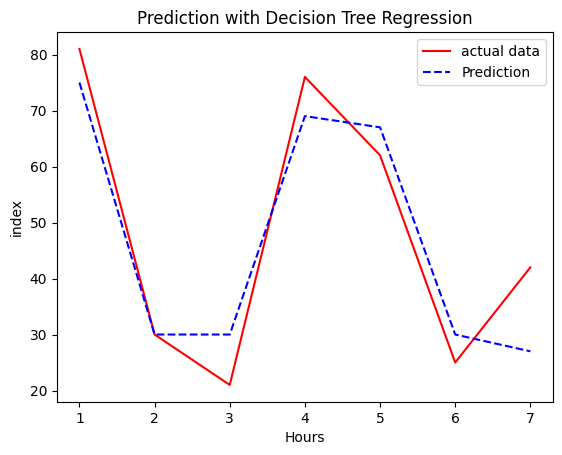

In [46]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Decision Tree Regression')
plt.legend()
plt.show()

In [47]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [48]:
print('r square Desicion tree result:',rsq_dt)

r square Desicion tree result: 0.8803859268443893


jika model Desicion tree dibandingkan dengan model linier regression direkomendasikan memakai model linear regression karena secara angka lebih tinggi dibanding decision tree

R Score Linear regresion = 95 R score decision tree = 88

**Random Forest**

In [2]:
#bandingkan dengan Random Forest
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Latih model decision tree dengan data yang sudah direshape
rf_model = RandomForestRegressor()
rf_model.fit(X_train_reshaped, y_train)

RandomForestRegressor()

In [51]:
#Predicting the Student Scores for the Test values
y_pred_rf=rf_model.predict(X_test)

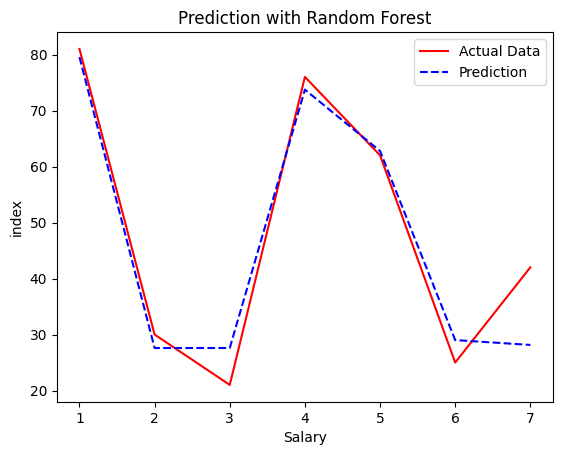

In [53]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

In [ ]:
print('r square Random Forest result:',rsq_rf)

r square Random Forest result: 0.9303801611903286
